# Import Libaries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.manifold import Isomap



# Read in Dataset

In [26]:
data = pd.read_csv("codon_usage.csv")
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Unnamed: 69
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,0.99903
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,0.99999
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,0.99997
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,1.00002
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,0.99997


# Clean Data and Split into Testing and Training Sets

In [ ]:
# Using the Ncodons column and the 64 codon frequency columns, not using speciesid, dna type
feature_cols = data.columns[np.r_[3, 5:69]]

print(feature_cols)

X = data[feature_cols].values

# Data cleaning
data[feature_cols] = data[feature_cols].replace('-', 0)
data[feature_cols] = data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0)


# Kingdom column is what is being classified
y = data['Kingdom'].values


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
# DNAtype is not being classified because it has classes that are too small

print(data['DNAtype'].value_counts())

# Kingdom column has a more even distribution of classes

print(data['Kingdom'].value_counts())

DNAtype
0     9266
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: count, dtype: int64
Kingdom
bct    2920
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: count, dtype: int64


# Run classification on Original Dataset

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

In [84]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy Random Forest: {train_acc:.3f}, Test Accuracy Random Forest: {test_acc:.3f}")

Train Accuracy Random Forest: 1.000, Test Accuracy Random Forest: 0.899


In [85]:


sample_values = [
    678, 0.0206,0.0324,0.0029,0.0118,0.0221,0.0147,0.0088,0.0088,
    0.0177,0.0103,0.0133,0.0162,0.0251,0.0177,0.0059,0.0147,
    0.0162,0.0162,0.0103,0.0103,0.0103,0.0074,0.0133,0.0088,
    0.0074,
    0.0103,0.0118,0.0310,0.0059,
    0.0162,0.0074,0.0103,0.0059,
    0.0103,0.0133,
    0.0103,0.0740,0.0088,0.0044,
    0.0118,0.0192,
    0.0295,0.0428,
    0.0133,0.0192,
    0.0103,0.0192,
    0.0118,0.0059,
    0.0413,0.0428,
    0.0059,0.0059,0.0103,0.0118,0.0133,0.0162,
    0.0133,0.0251,0.0811,0.0487,
    0.0000,0.0015,0.0015
]

# Put into DataFrame
sample_df = pd.DataFrame([sample_values])

# --- PREDICT ---
prediction = model.predict(sample_values)
probabilities = model.predict_proba(sample_values)

print("Predicted class:", prediction)
print("\nClass probabilities:")
for label, prob in zip(model.classes_, probabilities):
    print(f"{label}: {prob:.4f}")

ValueError: Expected 2D array, got 1D array instead:
array=[6.78e+02 2.06e-02 3.24e-02 2.90e-03 1.18e-02 2.21e-02 1.47e-02 8.80e-03
 8.80e-03 1.77e-02 1.03e-02 1.33e-02 1.62e-02 2.51e-02 1.77e-02 5.90e-03
 1.47e-02 1.62e-02 1.62e-02 1.03e-02 1.03e-02 1.03e-02 7.40e-03 1.33e-02
 8.80e-03 7.40e-03 1.03e-02 1.18e-02 3.10e-02 5.90e-03 1.62e-02 7.40e-03
 1.03e-02 5.90e-03 1.03e-02 1.33e-02 1.03e-02 7.40e-02 8.80e-03 4.40e-03
 1.18e-02 1.92e-02 2.95e-02 4.28e-02 1.33e-02 1.92e-02 1.03e-02 1.92e-02
 1.18e-02 5.90e-03 4.13e-02 4.28e-02 5.90e-03 5.90e-03 1.03e-02 1.18e-02
 1.33e-02 1.62e-02 1.33e-02 2.51e-02 8.11e-02 4.87e-02 0.00e+00 1.50e-03
 1.50e-03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy SVC: {train_acc:.3f}, Test Accuracy SVC: {test_acc:.3f}")

Train Accuracy: 0.957, Test Accuracy: 0.936


In [40]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy Logistic Regression: {train_acc:.3f}, Test Accuracy Logistic Regression: {test_acc:.3f}")

Train Accuracy: 0.870, Test Accuracy: 0.862


# Perform Linear dimensionality reduction algorithm

In [10]:
# from syde a4

def pca(X, d):
    pca_model = PCA(n_components=d)
    Y = pca_model.fit_transform(X.T).T
    Ud = pca_model.components_.T
    mu = pca_model.mean_.reshape(-1,1) 
    return mu, Ud, Y

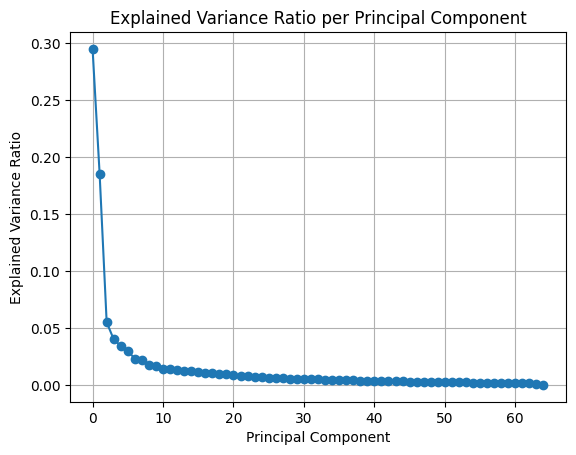

"train_scores, test_scores = [], []\nfor n in range(1, X_train.shape[1]+1):\n    model.fit(X_train_pca[:, :n], y_train)\n    train_scores.append(accuracy_score(y_train, model.predict(X_train_pca[:, :n])))\n    test_scores.append(accuracy_score(y_test, model.predict(X_test_pca[:, :n])))\n\nplt.plot(range(1, X_train.shape[1]+1), train_scores, label='Train')\nplt.plot(range(1, X_train.shape[1]+1), test_scores, label='Test')\nplt.xlabel('Number of PCA components')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.title('Performance vs PCA components')\nplt.show()\n\n# Scatter plot of first 2 PCs\nplt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({label:i for i,label in enumerate(y.unique())}))\nplt.xlabel('PC1')\nplt.ylabel('PC2')\nplt.title('Data distribution on first 2 PCs')\nplt.show()"

In [41]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance plot
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.grid(True)
plt.show()



# Performance vs number of components
'''train_scores, test_scores = [], []
for n in range(1, X_train.shape[1]+1):
    model.fit(X_train_pca[:, :n], y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train_pca[:, :n])))
    test_scores.append(accuracy_score(y_test, model.predict(X_test_pca[:, :n])))

plt.plot(range(1, X_train.shape[1]+1), train_scores, label='Train')
plt.plot(range(1, X_train.shape[1]+1), test_scores, label='Test')
plt.xlabel('Number of PCA components')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance vs PCA components')
plt.show()

# Scatter plot of first 2 PCs
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({label:i for i,label in enumerate(y.unique())}))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data distribution on first 2 PCs')
plt.show()'''

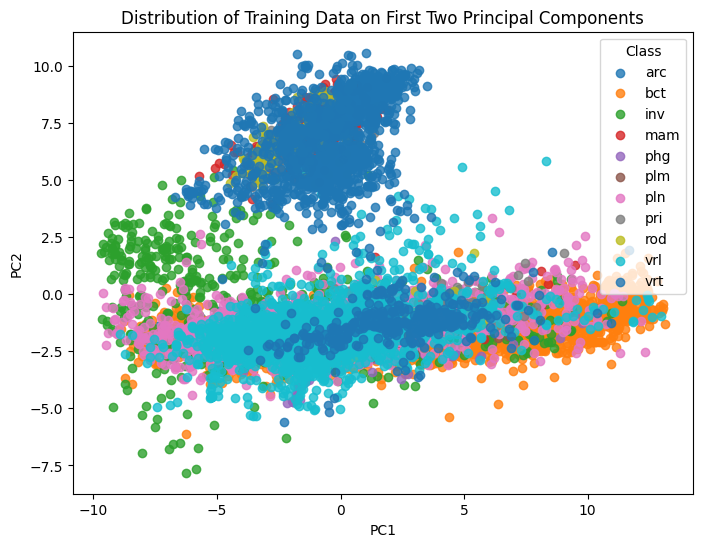

In [78]:
# First two principal components
pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]

# Convert labels to integers for coloring
unique_labels = np.unique(y_train)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
colors = np.array([label_to_int[label] for label in y_train])

plt.figure(figsize=(8,6))

# Plot each class separately for legend
for label in unique_labels:
    plt.scatter(
        pc1[y_train==label],
        pc2[y_train==label],
        alpha=0.8,
        label=label
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribution of Training Data on First Two Principal Components")
plt.legend(title="Class")
plt.show()

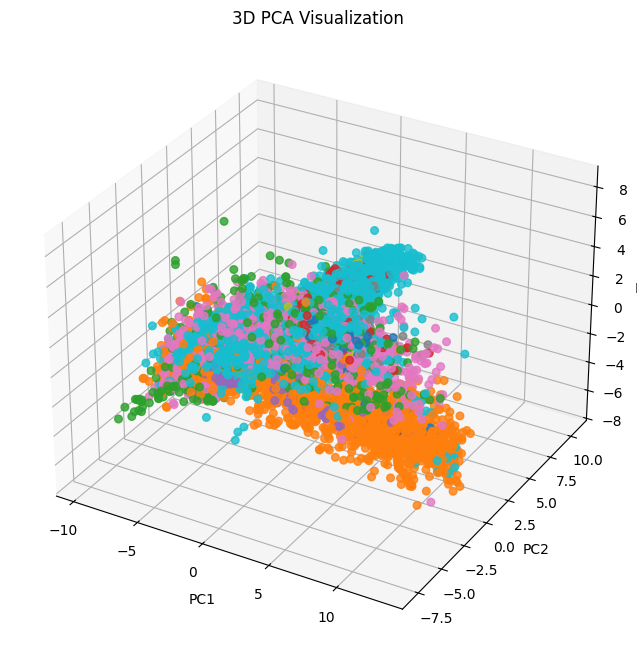

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=colors,
    cmap='tab10',
    s=30,
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization")

plt.show()

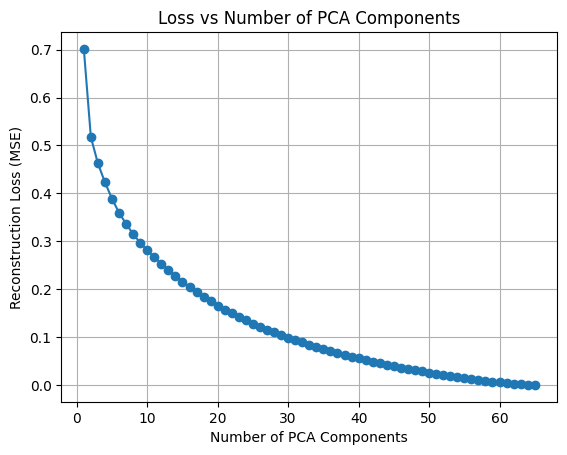

In [47]:
### Reconstruction loss vs number of components


losses = []
components_range = range(1, X_train.shape[1] + 1)

for k in components_range:
    pca_k = PCA(n_components=k)
    X_train_pca = pca_k.fit_transform(X_train)
    X_train_reconstructed = pca_k.inverse_transform(X_train_pca)

    loss = mean_squared_error(X_train, X_train_reconstructed)
    losses.append(loss)

plt.plot(components_range, losses, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Reconstruction Loss (MSE)')
plt.title('Loss vs Number of PCA Components')
plt.grid(True)
plt.show()

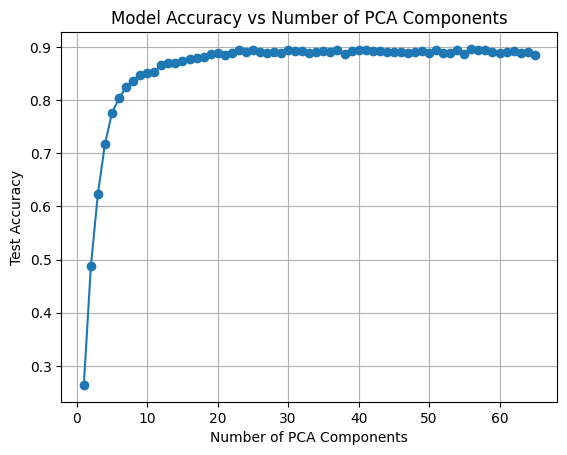

In [48]:
### Model accuracy vs. num. components

accs = []
components_range = range(1, X_train.shape[1] + 1)

for k in components_range:
    pca_k = PCA(n_components=k)
    X_train_pca = pca_k.fit_transform(X_train)
    X_test_pca = pca_k.transform(X_test)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accs.append(accuracy_score(y_test, y_pred))

plt.plot(components_range, accs, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy vs Number of PCA Components')
plt.grid(True)
plt.show()

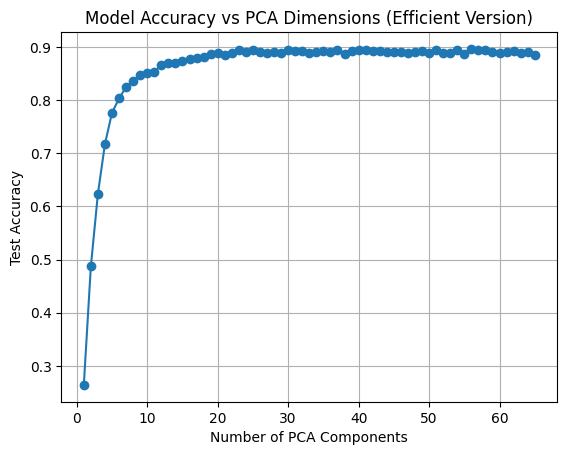

In [50]:
### Number of dimensions vs loss

pca = PCA()
X_train_pca_full = pca.fit_transform(X_train)
X_test_pca_full  = pca.transform(X_test)

components_range = range(1, X_train.shape[1] + 1)
accs = []

for k in components_range:
    X_train_pca_k = X_train_pca_full[:, :k]
    X_test_pca_k  = X_test_pca_full[:, :k]
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_pca_k, y_train)
    y_pred = model.predict(X_test_pca_k)
    
    accs.append(accuracy_score(y_test, y_pred))

plt.plot(components_range, accs, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy vs PCA Dimensions (Efficient Version)")
plt.grid(True)
plt.show()

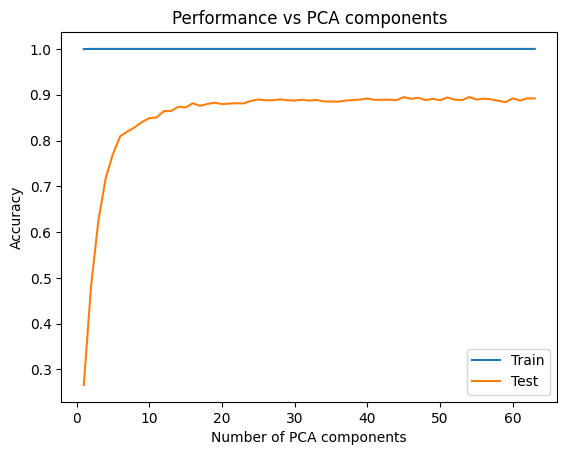

In [16]:
train_scores, test_scores = [], []
for n in range(1, X_train.shape[1]+1):
    model.fit(X_train_pca[:, :n], y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train_pca[:, :n])))
    test_scores.append(accuracy_score(y_test, model.predict(X_test_pca[:, :n])))

plt.plot(range(1, X_train.shape[1]+1), train_scores, label='Train')
plt.plot(range(1, X_train.shape[1]+1), test_scores, label='Test')
plt.xlabel('Number of PCA components')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance vs PCA components')
plt.show()

In [17]:
### LOOKING AT HOW THE PRINCIPAL COMPONENTS ARE MADE UP:

n_components = 2  # first 2 PCs
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)  # X_train = codon features scaled

# Convert to DataFrame for readability
pc_df = pd.DataFrame(pca.components_, columns=feature_cols, index=[f'PC{i+1}' for i in range(n_components)])

# Print first two principal components and their contributions from each feature
print(pc_df.T)  # transpose so features are rows

              PC1       PC2
Ncodons  0.012880 -0.013483
UUA     -0.170603  0.036017
UUG     -0.058113 -0.176441
CUU     -0.097161  0.103609
CUC      0.116976  0.193094
...           ...       ...
GAA     -0.106643 -0.135197
GAG      0.149178 -0.151030
UAA     -0.056485  0.057387
UAG     -0.003785 -0.011799
UGA     -0.041680  0.262834

[63 rows x 2 columns]


# Perform non-linear dimensionality reduction algorithm

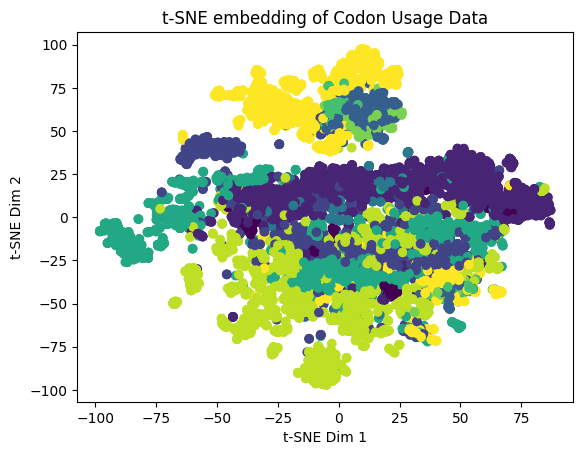

In [55]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_encoded)
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.title('t-SNE embedding of Codon Usage Data')
plt.show()


In [62]:
# Fit Isomap on training data
n_components_max = 10  # you can try up to ~10 components; increase if desired
train_scores = []
test_scores = []

for n in range(2, n_components_max + 1):  # Isomap requires >=2 dims
    iso = Isomap(n_components=n)
    X_train_iso = iso.fit_transform(X_train)
    X_test_iso = iso.transform(X_test)
    
    # Fit your classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_iso, y_train)
    
    # Compute accuracy
    y_pred_train = model.predict(X_train_iso)
    y_pred_test  = model.predict(X_test_iso)
    
    train_scores.append(accuracy_score(y_train, y_pred_train))
    test_scores.append(accuracy_score(y_test, y_pred_test))

/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity struct

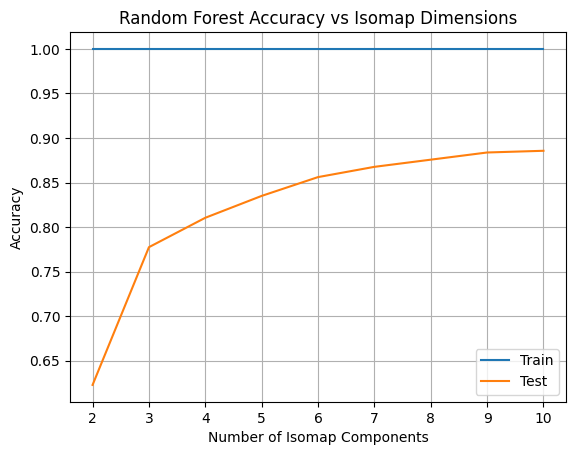

In [63]:
plt.plot(range(2, n_components_max + 1), train_scores, label='Train')
plt.plot(range(2, n_components_max + 1), test_scores, label='Test')
plt.xlabel('Number of Isomap Components')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Isomap Dimensions')
plt.legend()
plt.grid(True)
plt.show()

/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity struct

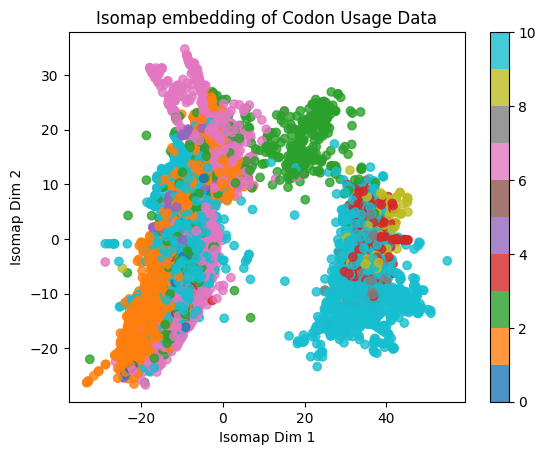

In [64]:
# Pick 2 components for plotting
iso_2d = Isomap(n_components=2)
X_train_iso_2d = iso_2d.fit_transform(X_train)

# Encode labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

plt.scatter(X_train_iso_2d[:, 0], X_train_iso_2d[:, 1], c=y_train_encoded, cmap='tab10', alpha=0.8)
plt.xlabel('Isomap Dim 1')
plt.ylabel('Isomap Dim 2')
plt.title('Isomap embedding of Codon Usage Data')
plt.colorbar()
plt.show()

In [ ]:
#umap

In [ ]:
#isomap

In [ ]:
### Plot the data in the new dimensional space and comment on how well the mapping separates the data

In [ ]:
### Plot the performance metric against how many of the new dimensions are used

# Checking Amino Acid Correlation

In [66]:
# Assuming X is your codon frequency DataFrame
codon_corr = X.corr()  # correlation matrix of codons
plt.figure(figsize=(12,10))
sns.heatmap(codon_corr, cmap='coolwarm', center=0)
plt.title("Codon Frequency Correlation Heatmap")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# PC1 loadings
pc1_loadings = pd.Series(pca.components_[0], index=X.columns)
pc2_loadings = pd.Series(pca.components_[1], index=X.columns)

# Sort by magnitude
print("Top contributors to PC1:")
print(pc1_loadings.abs().sort_values(ascending=False).head(10))
print("\nTop contributors to PC2:")
print(pc2_loadings.abs().sort_values(ascending=False).head(10))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [69]:
# Example mapping
aa_map = {
    'Phe': ['TTT', 'TTC'],
    'Leu': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    # add all codons...
}

# Sum loadings for each amino acid
aa_loadings_pc1 = {aa: pc1_loadings[codons].sum() for aa, codons in aa_map.items()}
print(aa_loadings_pc1)

NameError: name 'pc1_loadings' is not defined

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

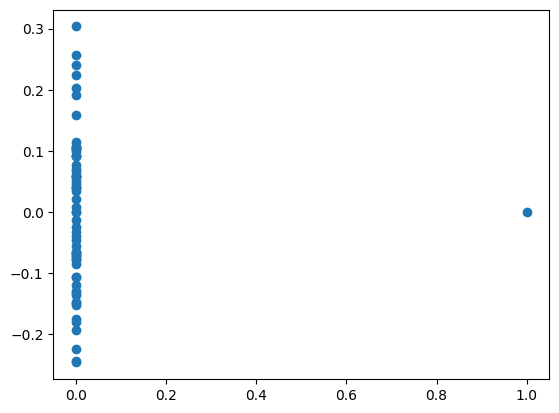

In [70]:
plt.scatter(pca.components_[0], pca.components_[1])
for i, codon in enumerate(X.columns):
    plt.text(pca.components_[0, i], pca.components_[1, i], codon)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Codon contributions in PC space")
plt.show()

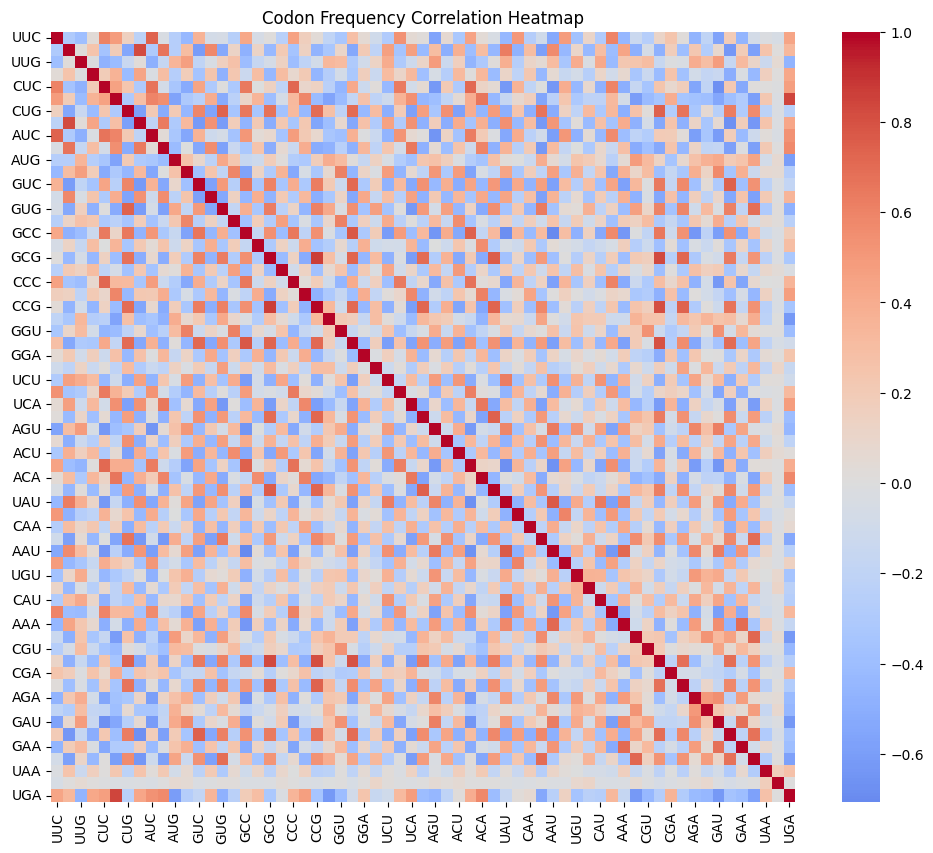

In [71]:
feature_cols = data.columns[6:69]  # or whatever range you use

# Select as a DataFrame (not .values!)
X_df = data[feature_cols]

# Compute correlation
codon_corr = X_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(codon_corr, cmap='coolwarm', center=0)
plt.title("Codon Frequency Correlation Heatmap")
plt.show()

# LDA

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assume feature_cols are codon columns and data['Kingdom'] is your label
X_df = data[feature_cols]
y = data['Kingdom']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=min(len(y.unique())-1, X_train.shape[1]))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

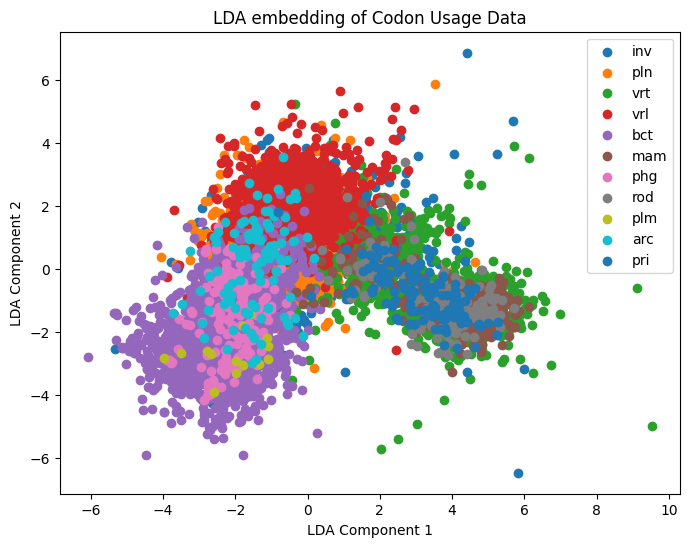

In [73]:
# If you have at least 2 LDA components
plt.figure(figsize=(8,6))
for label in y_train.unique():
    plt.scatter(
        X_train_lda[y_train==label, 0], 
        X_train_lda[y_train==label, 1], 
        label=label
    )

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA embedding of Codon Usage Data")
plt.legend()
plt.show()

In [74]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_lda, y_train)

y_train_pred = model.predict(X_train_lda)
y_test_pred = model.predict(X_test_lda)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

Train Accuracy: 1.000, Test Accuracy: 0.856


In [75]:
# LDA coefficients for each feature
lda_coef = pd.DataFrame(lda.coef_, columns=X_df.columns, index=lda.classes_)
print(lda_coef)

          UUC       UUA       UUG       CUU       CUC       CUA       CUG  \
arc  0.675829  1.472957  0.395634  1.217515  3.274798  2.350330  1.870694   
bct -0.691089  0.036485 -0.153263 -0.067004  0.109191 -0.344108  0.312280   
inv -0.307445 -0.278967  0.255966 -1.117190 -0.969084 -2.648680 -1.131486   
mam  0.493195 -0.325337  0.072991  0.331617  0.359785  3.191866  2.641362   
phg  0.047636 -1.311786 -0.754284  0.424515  0.801990  1.050178  0.246699   
plm -0.216269 -0.364649 -0.349243  0.060170 -0.607020 -0.125421  0.913992   
pln  0.356072  0.360934  0.456429  0.164139 -0.041531  0.078143 -1.071341   
pri  0.815253 -0.815137 -0.718078  0.495422  1.272919  2.198306  2.989057   
rod  1.433086 -0.078812 -0.056206  0.941009 -0.618072 -0.414808  1.788363   
vrl -0.151217 -0.568796 -0.065086 -0.463642 -0.639224 -0.271673 -1.471059   
vrt  0.545312  0.687567 -0.309286  0.899419  0.971786  1.194413  2.281148   

          AUU       AUC       AUA  ...       CGG       AGA       AGG  \
arc

# Run on another dataset

ValueError: Expected 2D array, got 1D array instead:
array=[6.78e+02 2.06e-02 3.24e-02 2.90e-03 1.18e-02 2.21e-02 1.47e-02 8.80e-03
 8.80e-03 1.77e-02 1.03e-02 1.33e-02 1.62e-02 2.51e-02 1.77e-02 5.90e-03
 1.47e-02 1.62e-02 1.62e-02 1.03e-02 1.03e-02 1.03e-02 7.40e-03 1.33e-02
 8.80e-03 7.40e-03 1.03e-02 1.18e-02 3.10e-02 5.90e-03 1.62e-02 7.40e-03
 1.03e-02 5.90e-03 1.03e-02 1.33e-02 1.03e-02 7.40e-02 8.80e-03 4.40e-03
 1.18e-02 1.92e-02 2.95e-02 4.28e-02 1.33e-02 1.92e-02 1.03e-02 1.92e-02
 1.18e-02 5.90e-03 4.13e-02 4.28e-02 5.90e-03 5.90e-03 1.03e-02 1.18e-02
 1.33e-02 1.62e-02 1.33e-02 2.51e-02 8.11e-02 4.87e-02 0.00e+00 1.50e-03
 1.50e-03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
import requests
import pandas as pd
import re
from io import StringIO

url = "https://www.kazusa.or.jp/codon/cgi-bin/showcodon.cgi?species=171929"
resp = requests.get(url)
html = resp.text

# Extract lines containing codon usage
pattern = r"([ACGU]{3})\s+([\d\.]+)\(\s*(\d+)\)"
matches = re.findall(pattern, html)

data = []
for codon, freq_str, count_str in matches:
    data.append({
        "codon": codon,
        "freq_per_1000": float(freq_str),
        "count": int(count_str)
    })

df = pd.DataFrame(data).set_index("codon")

print(df.sort_index())

       freq_per_1000  count
codon                      
AAA             41.3     28
AAC             19.2     13
AAG             42.8     29
AAU             13.3      9
ACA              8.8      6
...              ...    ...
UGU             10.3      7
UUA              2.9      2
UUC             32.4     22
UUG             11.8      8
UUU             20.6     14

[64 rows x 2 columns]
